In [ ]:
#Regression Evaluation metrics

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler

column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('D:\\AppStoneLab\\Day 2\\housing.csv', header=None, delimiter=r"\s+", names=column_names)

X=data.drop('MEDV', axis=1)
y=data['MEDV']

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.25, random_state=100)

LR=LinearRegression()
LR.fit(X_train, y_train)
y_pred=LR.predict(X_test)
print("Before normalization : \n")
MAE=mean_absolute_error(y_test, y_pred)
print("MAE: ", MAE)

MSE=mean_squared_error(y_test, y_pred)
print("MSE: ", MSE)

r2=r2_score(y_test, y_pred)
print("r2 score: ",r2)

Before normalization : 

MAE:  3.3884038714080087
MSE:  27.173144173043582
r2 score:  0.7246154314616741


Accuracy:  0.717391304347826
Precision:  0.7428571428571429
Recall:  0.8666666666666667
F1 score:  0.8
ROC_AUC score:  0.6520833333333333


[]

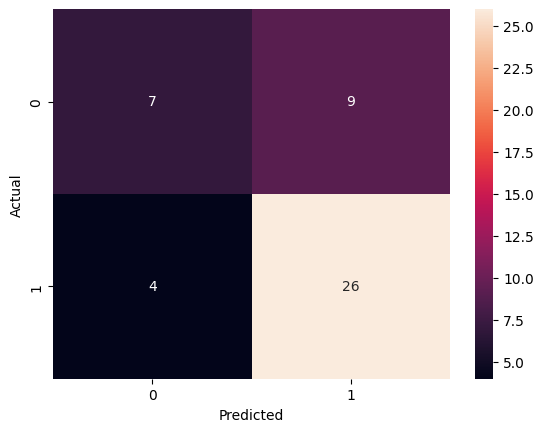

In [110]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('D:\\AppStoneLab\\Day 1\\Titanic-Dataset.csv')
df.dropna(inplace=True)

df=pd.get_dummies(data=df,columns=['Sex','Embarked'], dtype='int')

df.drop(columns=['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1, inplace=True)
df.head()

X=df.drop('Survived', axis=1)
y=df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

model=LogisticRegression(solver='saga', random_state=100, max_iter=7000)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

accuracy=accuracy_score(y_test, y_pred)
precision=precision_score(y_test, y_pred)
recall=recall_score(y_test, y_pred)
f1=f1_score(y_test, y_pred)
roc_auc=roc_auc_score(y_test, y_pred)
cm=confusion_matrix(y_true=y_test, y_pred=y_pred)

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 score: ", f1)
print("ROC_AUC score: ", roc_auc)

sns.heatmap(cm, annot=True)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.plot()


F1 score:  0.9541284403669725
ROC_AUC score:  0.9585385878489326


[]

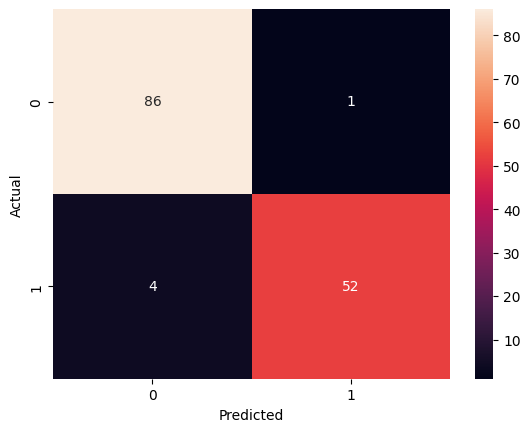

In [88]:
#KNN

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

df=pd.read_csv('KNNAlgorithmDataset.csv')
df.drop('Unnamed: 32',axis=1, inplace=True)

X=df.drop('diagnosis', axis=1)
y=df['diagnosis'].map({'B': 0, 'M': 1})

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.25, random_state=100)
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

knn=KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)

f1=f1_score(y_test, y_pred)
roc_auc=roc_auc_score(y_test, y_pred)
cm=confusion_matrix(y_true=y_test, y_pred=y_pred)

print("F1 score: ",f1)
print("ROC_AUC score: ",roc_auc)
sns.heatmap(cm, annot=True)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.plot()


F1 score:  0.9636363636363636
ROC_AUC score:  0.9674671592775042


[]

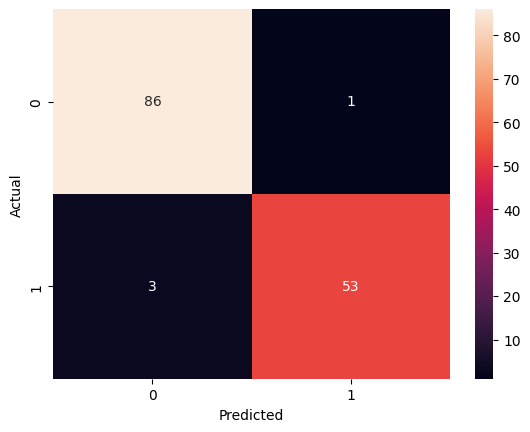

In [ ]:
#SVM

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder

df=pd.read_csv('KNNAlgorithmDataset.csv')
df.drop('Unnamed: 32',axis=1, inplace=True)

X=df.drop('diagnosis', axis=1)
y=df['diagnosis'].map({'B': 0, 'M': 1})

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.25, random_state=100)
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

svc=SVC() #parameters can be changed(using default for now)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

f1=f1_score(y_test, y_pred)
roc_auc=roc_auc_score(y_test, y_pred)
cm=confusion_matrix(y_true=y_test, y_pred=y_pred)

print("F1 score: ",f1)
print("ROC_AUC score: ",roc_auc)
sns.heatmap(cm, annot=True)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.plot()

F1 score per class: [1.         0.9        0.92857143]
ROC-AUC score: 0.9934523809523809
Confusion Matrix:
 [[14  0  0]
 [ 0  9  1]
 [ 0  1 13]]


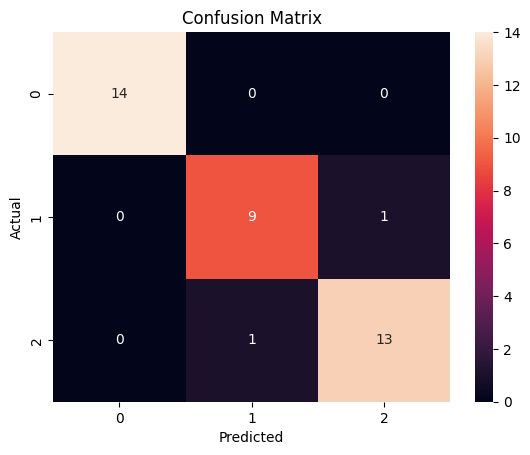

In [ ]:
#Gaussian naive bayes
from sklearn.naive_bayes import GaussianNB

df = pd.read_csv('D:\\AppStoneLab\\Day 2\\Iris.csv')

X = df.drop(columns=['Id', 'Species'], axis=1)
y = df['Species'].map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred_labels = gnb.predict(X_test)        # predicted class labels
y_pred_prob = gnb.predict_proba(X_test)    # predicted probabilities (for ROC-AUC)


f1 = f1_score(y_test, y_pred_labels, average=None)
print("F1 score per class:", f1)

# ROC-AUC score (multiclass, weighted average)
roc_auc = roc_auc_score(
    y_test, 
    y_pred_prob, 
    multi_class='ovr', 
    average='macro'
)
print("ROC-AUC score:", roc_auc)

cm = confusion_matrix(y_test, y_pred_labels)
sns.heatmap(cm, annot=True)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


F1 score:  0.9307479224376731
ROC_AUC score:  0.9657372728533777


[]

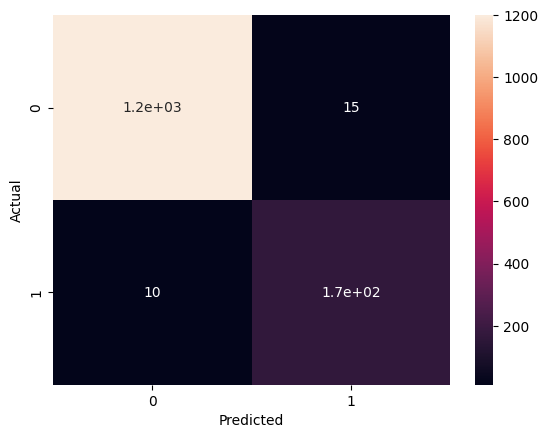

In [118]:
#Multinomial Naive Bayes

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

df=pd.read_csv('spam.csv', encoding='iso8859_14')
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['v2'])
y=df['v1'].map({'ham':0, 'spam':1})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred = mnb.predict(X_test)

f1=f1_score(y_test, y_pred)
roc_auc=roc_auc_score(y_test, y_pred)
cm=confusion_matrix(y_true=y_test, y_pred=y_pred)

print("F1 score: ",f1)
print("ROC_AUC score: ",roc_auc)
sns.heatmap(cm, annot=True)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.plot()

F1 score:  [1.         0.9        0.92857143]


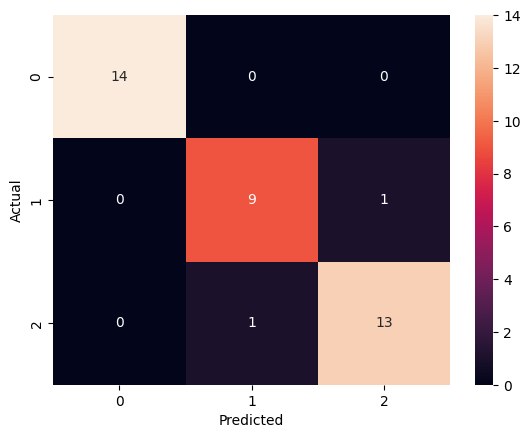

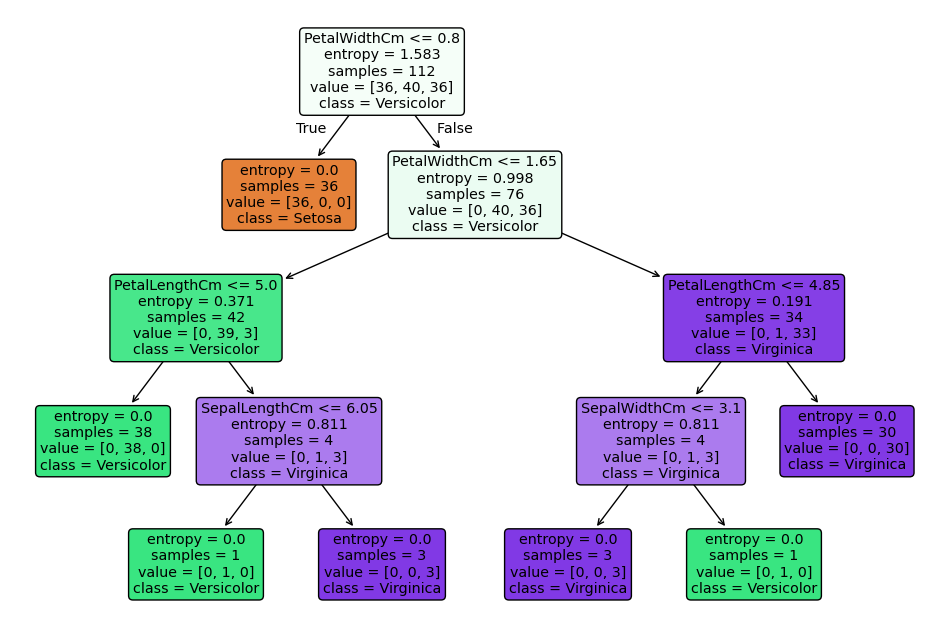

In [126]:
#Decision Tree

from sklearn.tree import DecisionTreeClassifier, plot_tree

df=pd.read_csv('D:\\AppStoneLab\\Day 2\\Iris.csv')

X = df.drop(columns=['Id', 'Species'], axis=1)
y = df['Species'].map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

DT=DecisionTreeClassifier(criterion='entropy')
DT.fit(X_train, y_train)
y_pred = DT.predict(X_test)

f1=f1_score(y_test, y_pred, average=None)
# roc_auc=roc_auc_score(y_test, y_pred, multi_class='ovr', average='macro')
cm=confusion_matrix(y_true=y_test, y_pred=y_pred)

print("F1 score: ",f1)
# print("ROC_AUC score: ",roc_auc)
sns.heatmap(cm, annot=True)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.plot()

plt.figure(figsize=(12,8))
plot_tree(DT, feature_names=X.columns, class_names=['Setosa','Versicolor','Virginica'],
          filled=True, rounded=True)
plt.show()

F1 score:  [1.         0.9        0.92857143]


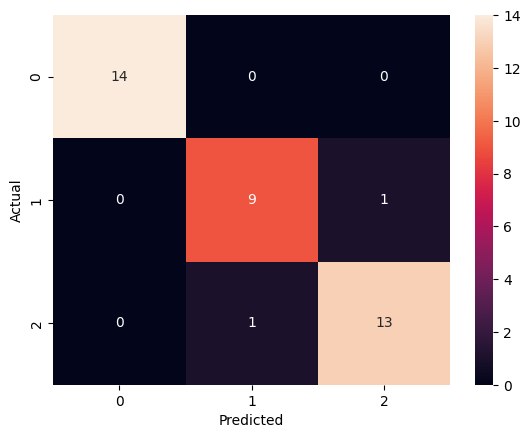

Feature Importance:
 PetalLengthCm    0.445684
PetalWidthCm     0.434968
SepalLengthCm    0.094550
SepalWidthCm     0.024798
dtype: float64


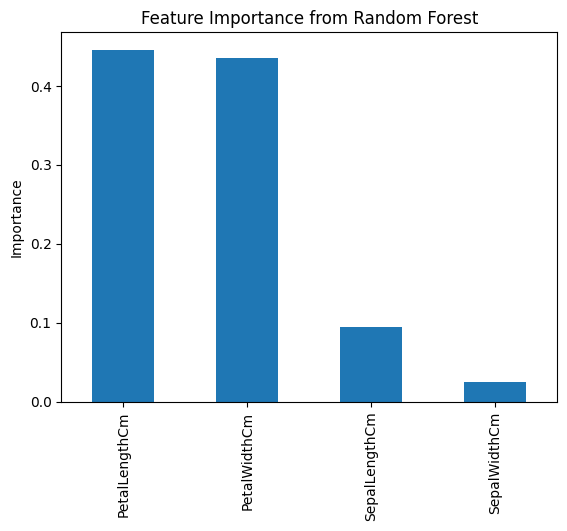

In [ ]:
#Random Forest 

from sklearn.ensemble import RandomForestClassifier

df=pd.read_csv('D:\\AppStoneLab\\Day 2\\Iris.csv')

X = df.drop(columns=['Id', 'Species'], axis=1)
y = df['Species'].map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

rf=RandomForestClassifier(n_estimators=100, random_state=100)
rf.fit(X_train, y_train)
y_pred=rf.predict(X_test)

f1=f1_score(y_test, y_pred, average=None)
cm=confusion_matrix(y_true=y_test, y_pred=y_pred)

print("F1 score: ",f1)
sns.heatmap(cm, annot=True)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

feature_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Feature Importance:\n", feature_importance)

# Optional: plot feature importance
feature_importance.plot(kind='bar')
plt.ylabel('Importance')
plt.title('Feature Importance from Random Forest')
plt.show()

F1 score:  [1.         0.9        0.92857143]


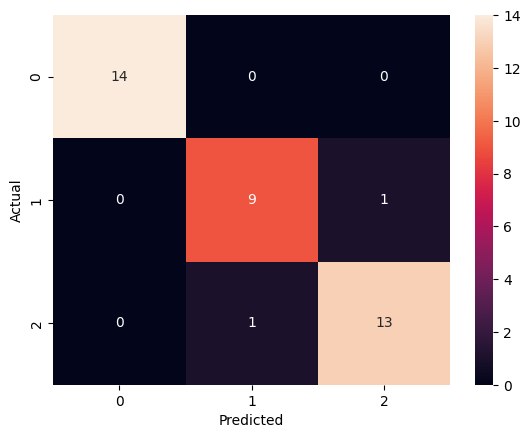

In [134]:
#Adaboost classifier

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

df=pd.read_csv('D:\\AppStoneLab\\Day 2\\Iris.csv')

X = df.drop(columns=['Id', 'Species'], axis=1)
y = df['Species'].map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

base_est = DecisionTreeClassifier(max_depth=1, random_state=100)
ada = AdaBoostClassifier(estimator=base_est, n_estimators=50, learning_rate=1.0, random_state=100)

ada.fit(X_train, y_train)
y_pred=ada.predict(X_test)

f1=f1_score(y_test, y_pred, average=None)
cm=confusion_matrix(y_true=y_test, y_pred=y_pred)

print("F1 score: ",f1)
sns.heatmap(cm, annot=True)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

F1 score:  [1.         0.94736842 0.96551724]


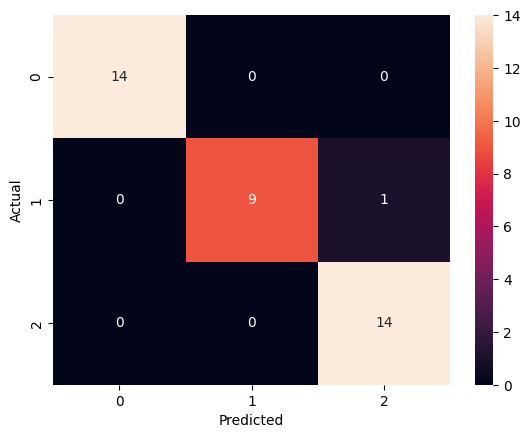

In [135]:
#gradient boosting machine

from sklearn.ensemble import GradientBoostingClassifier

df=pd.read_csv('D:\\AppStoneLab\\Day 2\\Iris.csv')

X = df.drop(columns=['Id', 'Species'], axis=1)
y = df['Species'].map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

gbc=GradientBoostingClassifier(n_estimators=50, learning_rate=1, random_state=100, max_features=5)
gbc.fit(X_train, y_train)
y_pred=gbc.predict(X_test)

f1=f1_score(y_test, y_pred, average=None)
cm=confusion_matrix(y_true=y_test, y_pred=y_pred)

print("F1 score: ",f1)
sns.heatmap(cm, annot=True)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

F1 score:  [1.         0.9        0.92857143]


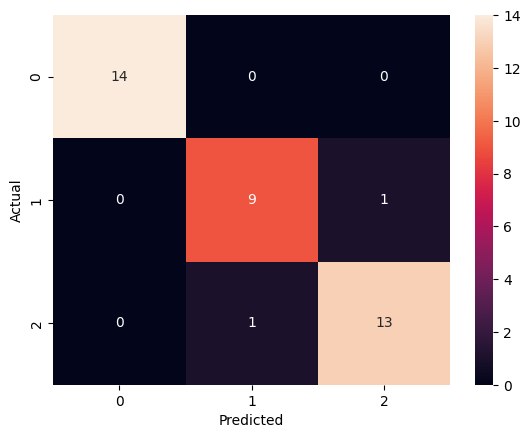

In [139]:
#XGBoost

from xgboost import XGBClassifier

df=pd.read_csv('D:\\AppStoneLab\\Day 2\\Iris.csv')

X = df.drop(columns=['Id', 'Species'], axis=1)
y = df['Species'].map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

xgbc=XGBClassifier(n_estimators=10, max_depth=3, learning_rate=1, objective='binary:logistic', random_state=100)
xgbc.fit(X_train, y_train)
y_pred=xgbc.predict(X_test)

f1=f1_score(y_test, y_pred, average=None)
cm=confusion_matrix(y_true=y_test, y_pred=y_pred)

print("F1 score: ",f1)
sns.heatmap(cm, annot=True)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Cluster assignments: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 2 2 2 0 2 0 2 0 2 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0
 0 2 2 2 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 0 2 2 2 0 2
 2 2]
Adjusted Rand Index: 0.645147003482001


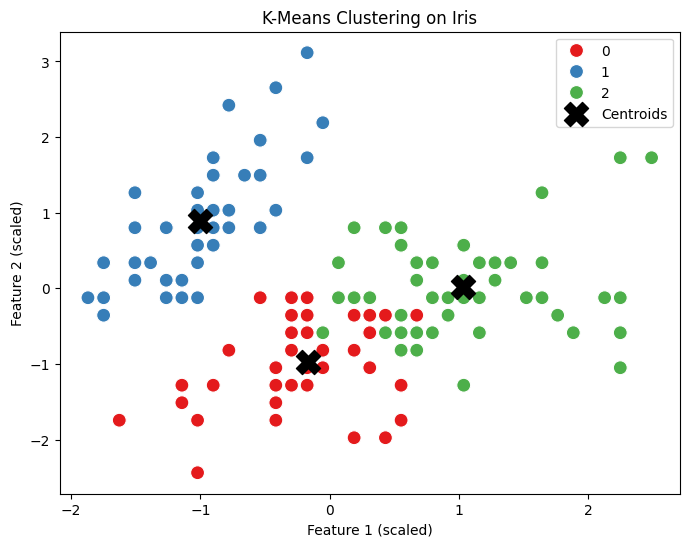

<Axes: >

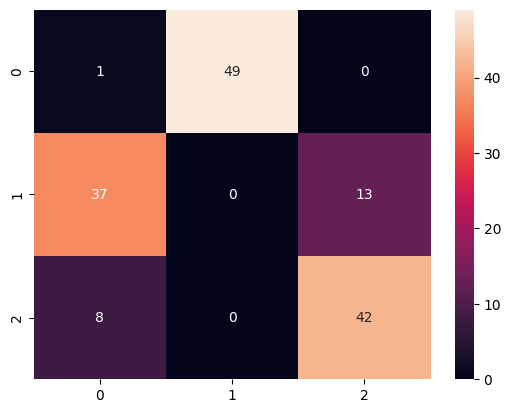

In [168]:
#K means clustering

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, adjusted_rand_score

df=pd.read_csv('D:\\AppStoneLab\\Day 2\\Iris.csv')

X = df.drop(columns=['Id', 'Species'], axis=1)
y = df['Species'].map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

km=KMeans(n_clusters=3, random_state=100)
km.fit(X_scaled)
clusters = km.predict(X_scaled)
print("Cluster assignments:", clusters)

ari = adjusted_rand_score(y, clusters)
print("Adjusted Rand Index:", ari)

# Confusion matrix
cm = confusion_matrix(y, clusters)


# 7️⃣ Visualize clusters (using first 2 features)
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_scaled[:,0], y=X_scaled[:,1], hue=clusters, palette='Set1', s=100)
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s=300, c='black', marker='X', label='Centroids')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.title('K-Means Clustering on Iris')
plt.legend()
plt.show()

sns.heatmap(cm, annot=True)

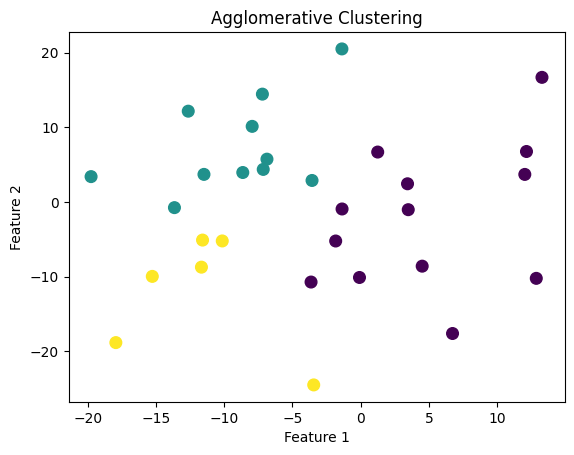

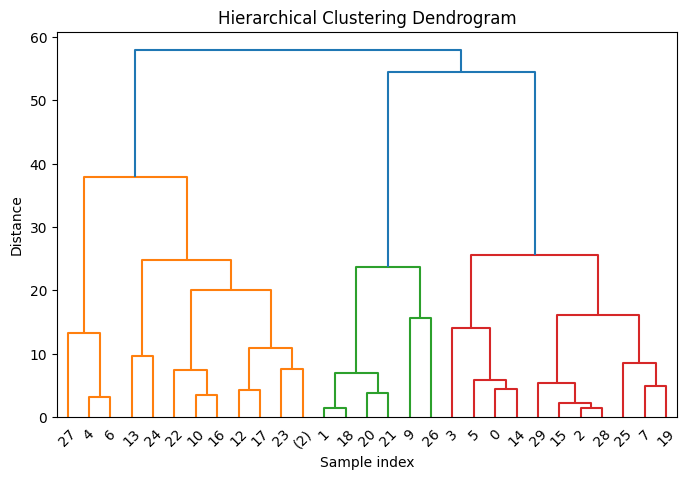

In [159]:
#Hierarchical Clustering 

import numpy as np
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import make_blobs

X, _ = make_blobs(n_samples=30, centers=3, cluster_std=10, random_state=42)

clustering = AgglomerativeClustering(n_clusters=3)
labels = clustering.fit_predict(X)

agg = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
agg.fit(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=70)
plt.title("Agglomerative Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

agg = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
agg.fit(X)

counts = np.zeros(agg.children_.shape[0])
n_samples = len(agg.labels_)

for i, merge in enumerate(agg.children_):
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            current_count += 1
        else:
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

linkage_matrix = np.column_stack(
    [agg.children_, agg.distances_, counts]
).astype(float)

plt.figure(figsize=(8, 5))
dendrogram(linkage_matrix, truncate_mode='level', p=5)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.show()

Cluster labels: [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1  0  0  0  0  0  0 -1  0
  0  0  0  0  0  0  0  0 -1 -1  0  0  0  0  0  0  0 -1  0  0  0  0  0  0
  0  0  1  1  1  1  1  1 -1 -1  1 -1 -1  1 -1  1  1  1  1  1 -1  1  1  1
 -1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1 -1  1  1  1  1  1 -1  1  1
  1  1 -1  1 -1  1  1  1  1 -1 -1 -1 -1 -1  1  1  1  1 -1  1  1 -1 -1 -1
  1  1 -1  1  1 -1  1  1  1 -1 -1 -1  1  1  1 -1 -1  1  1  1  1  1  1  1
  1  1  1  1 -1  1]
Number of clusters (excluding noise): 2
Number of noise points: 35
Adjusted Rand Index: 0.4282634768714612


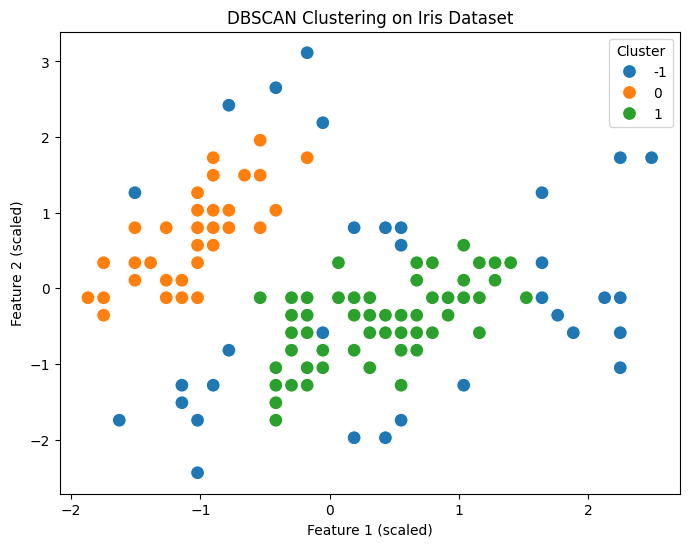

In [ ]:
#DBSCAN clustering
# not a good dataset :(
from sklearn.cluster import DBSCAN

df=pd.read_csv('D:\\AppStoneLab\\Day 2\\Iris.csv')

X = df.drop(columns=['Id', 'Species'], axis=1)
y = df['Species'].map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

dbscan=DBSCAN(eps=0.5,min_samples=5)
clusters = dbscan.fit_predict(X_scaled)

print("Cluster labels:", clusters)
print("Number of clusters (excluding noise):", len(set(clusters)) - (1 if -1 in clusters else 0))
print("Number of noise points:", list(clusters).count(-1))

ari = adjusted_rand_score(y, clusters)
print("Adjusted Rand Index:", ari)

plt.figure(figsize=(8,6))
sns.scatterplot(
    x=X_scaled[:, 0],
    y=X_scaled[:, 1],
    hue=clusters,
    palette='tab10',
    s=100
)
plt.title("DBSCAN Clustering on Iris Dataset")
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.legend(title="Cluster")
plt.show()

In [189]:
#PCA

df=pd.read_csv('D:\\AppStoneLab\\Day 2\\Iris.csv')

X = df.drop(columns=['Id', 'Species'], axis=1)
y = df['Species']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

cov_matrix = np.cov(X_scaled.T)
print("Covariance Matrix:\n", cov_matrix)

eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

print("Eigenvalues:\n", eigenvalues)
print("Eigenvectors:\n", eigenvectors)

idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

W = eigenvectors[:, :2]
X_pca_manual = X_scaled.dot(W)

print("Reduced data shape:", X_pca_manual.shape)

Covariance Matrix:
 [[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]
Eigenvalues:
 [2.93035378 0.92740362 0.14834223 0.02074601]
Eigenvectors:
 [[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]
Reduced data shape: (150, 2)


Explained Variance Ratio: [0.72770452 0.23030523]


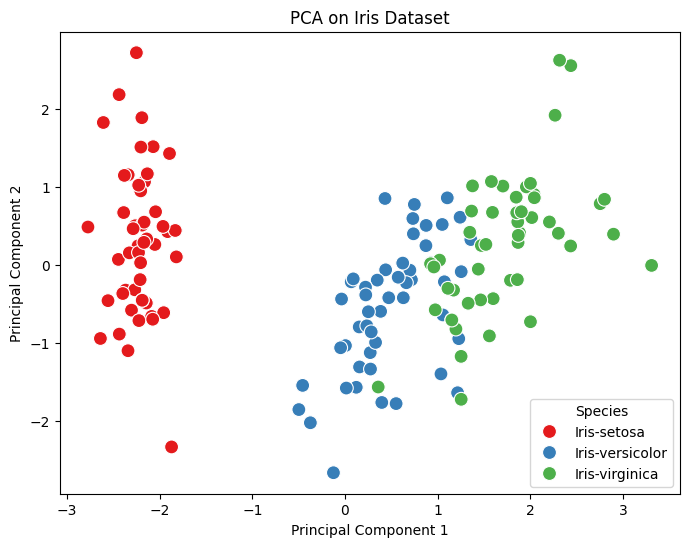

In [ ]:
#PCA_continued

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("Explained Variance Ratio:", pca.explained_variance_ratio_)

plt.figure(figsize=(8,6))
sns.scatterplot(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    hue=y,
    palette='Set1',
    s=100
)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA on Iris Dataset')
plt.show()

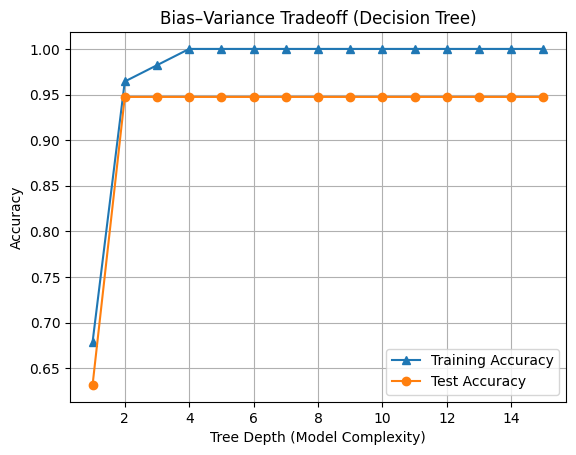

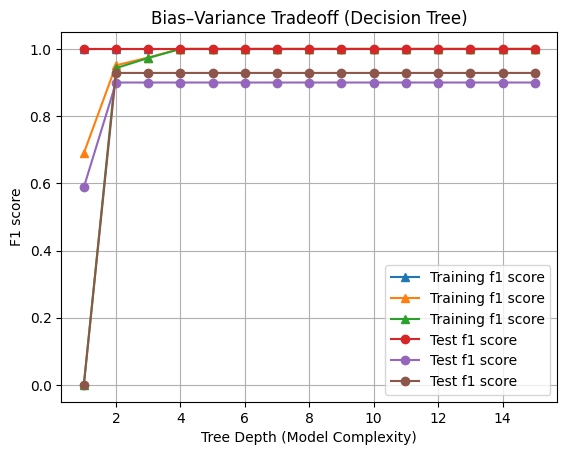

In [192]:
#Bias-Variance tradeoffs

from sklearn.metrics import accuracy_score, f1_score

df = pd.read_csv('D:\\AppStoneLab\\Day 2\\Iris.csv')

X = df.drop(columns=['Id', 'Species'], axis=1)
y = df['Species'].map({'Iris-setosa': 0,'Iris-versicolor': 1,'Iris-virginica': 2})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

train_accuracies = []
test_accuracies = []
train_f1=[]
test_f1=[]
depths = range(1, 16)

# Train models with increasing complexity
for depth in depths:
    model = DecisionTreeClassifier(max_depth=depth, random_state=100)
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    train_f1.append(f1_score(y_train, y_train_pred, average=None))
    test_f1.append(f1_score(y_test, y_test_pred, average=None))

plt.plot(depths, train_accuracies, label='Training Accuracy', marker='^')
plt.plot(depths, test_accuracies, label='Test Accuracy', marker='o')
plt.xlabel('Tree Depth (Model Complexity)')
plt.ylabel('Accuracy')
plt.title('Bias–Variance Tradeoff (Decision Tree)')
plt.legend()
plt.grid()
plt.show()

plt.plot(depths, train_f1, label='Training f1 score', marker='^')
plt.plot(depths, test_f1, label='Test f1 score', marker='o')
plt.xlabel('Tree Depth (Model Complexity)')
plt.ylabel('F1 score')
plt.title('Bias–Variance Tradeoff (Decision Tree)')
plt.legend()
plt.grid()
plt.show()


In [193]:
#cross validation

from sklearn.model_selection import StratifiedKFold, cross_val_score

df = pd.read_csv('D:\\AppStoneLab\\Day 2\\Iris.csv')

X = df.drop(columns=['Id', 'Species'], axis=1)
y = df['Species'].map({'Iris-setosa': 0,'Iris-versicolor': 1,'Iris-virginica': 2})

model = DecisionTreeClassifier(max_depth=3, random_state=100)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=100)

cv_scores = cross_val_score(model,X,y,cv=skf,scoring='accuracy')

print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", cv_scores.mean())
print("Standard deviation:", cv_scores.std())

Cross-validation scores: [1.         0.9        0.86666667 0.96666667 1.        ]
Mean accuracy: 0.9466666666666667
Standard deviation: 0.054160256030906385
